In [2]:
import networkx as nx
import csv
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
G_all_roads = nx.DiGraph()
both_false=[]
with open('Straßengraph/edges_th_with_frc.csv', newline='') as csvfile:
    with open('Straßengraph/coordinates_th.csv', newline='') as coordinates:    
        spamreader = csv.reader(csvfile, delimiter=';')
        cooreader = csv.reader(coordinates, delimiter=';')
        count=0
        coorrows = list(cooreader)
        for row in spamreader:        
            Id,u,v,length,maxspeed, maxspeedtrucks, IsF, IsB, Frc=row
            #print(type(Id))
            #print(Id)
            #interestingrows=[row for idx, row in enumerate(cooreader) if idx ==int(Id)]
            #interestingrows=[row2 for idx, row2 in enumerate(cooreader) if idx ==2]
            #print(coorrow[int(Id)])
            coorrow=coorrows[int(Id)]
            #length_of_coorrow=len(coorrow[int(Id)])
            #print(interestingrows)
            if(IsF=='True'):#forward=True
            #print(length1)
                G_all_roads.add_node(u,y=coorrow[1],x=coorrow[2])
                G_all_roads.add_node(v,y=coorrow[-2],x=coorrow[-1])
                G_all_roads.add_edge(u,v,Id=Id,length=int(length),maxspeed=float(maxspeed),maxspeedtrucks=float(maxspeedtrucks),
                            y1=coorrow[1],x1=coorrow[2],y2=coorrow[-2],x2=coorrow[-1],frc=int(Frc),time=int(length)/float(maxspeedtrucks))
            #WEprint(int(list(row)[1]), int(list(row)[2]))
            if(IsB=='True'):#forward=True
                G_all_roads.add_node(u,y=coorrow[1],x=coorrow[2])
                G_all_roads.add_node(v,y=coorrow[-2],x=coorrow[-1])
                G_all_roads.add_edge(v,u,Id=Id,length=int(length),maxspeed=float(maxspeed),maxspeedtrucks=float(maxspeedtrucks),
                           y1=coorrow[1],x1=coorrow[2],y2=coorrow[-2],x2=coorrow[-1],frc=int(Frc),time=int(length)/float(maxspeedtrucks))
            #if(IsF!='True' and IsB !="True"):
            #   both_false.append(Id)
            #count+=1
            #if count>3:
            #    break

In [4]:
coory=nx.get_node_attributes(G_all_roads,"y")
coorx=nx.get_node_attributes(G_all_roads,"x")
def dist(a, b):
    x1=float(coorx[a])
    x2=float(coorx[b])
    y1=float(coory[a])
    y2=float(coory[b])
    return(math.sqrt(((x1-x2)*71)**2+((y1-y2)*111)**2)*1000*100)

## Heuristic search

first check for some nodes the difference bettween the euclidean distance and the distance from the edge attributes

In [5]:
nodelist=list(G_all_roads.nodes())

In [6]:
random.seed(42)
sample_nodes=random.sample(nodelist,20)

In [6]:
#start_node=sample_nodes[0]
#for i in range(1,len(sample_nodes)):
#    start=time.time()
#    len_1=dist(start_node,sample_nodes[i])
#    len_2=nx.astar_path_length(G_all_roads, start_node,sample_nodes[i], heuristic=dist, weight='length')
#    end=time.time()
#    print(len_2/len_1,len_2/100000,end-start)

1.2072613396177674 146.97555 1.3754701614379883
1.1720939396747547 221.37405 2.1194753646850586
1.1937509400519302 154.93744 1.2374107837677002
1.2389876064219005 51.43946 0.11693263053894043
1.1955897183368311 183.13892 1.363724946975708
1.2820849345817191 68.17375 0.23101472854614258
1.2517675992824933 133.16647 0.7375600337982178
1.3472483599744982 72.98993 0.38023829460144043
1.1889134113336794 154.74121 1.354346513748169
1.214087478092779 138.7104 1.2211155891418457
1.2465131890957408 140.62042 0.8000698089599609
1.2079013207760763 136.60461 0.9880449771881104
1.182976475070832 157.68779 1.1771540641784668
1.259730238583179 143.29351 1.361076831817627
1.1710943408924723 138.01379 1.0434341430664062
1.2321989475521087 55.56902 0.13437175750732422
1.2381117820381118 102.82701 0.5802309513092041
1.17553118147935 142.06998 0.9643604755401611
1.213451224452841 208.23508 2.790527582168579


## First Impression
- Großer Zusammenhang zwischen Länge des Weges und Berechnungszeit in Astar
- There is a big dependance between the eucledean distance and the calculationtime of Astar

- Faktor liegt bei Circa 1,2 bis 1,3, Suche mehr um es genau herauszufinden
- the factor, between the eucledean length and the real distance is mostly between 1.17 and 1.3

## Create for 100 nodes the Factor between the Astar and Eucleadean difference to determine a factor

In [7]:
random.seed(5234)
sample_nodes=random.sample(nodelist,100)
start_sample=random.sample(sample_nodes,5)

In [8]:
important_list=[]
for i in range(len(start_sample)):
    for j in range(len(sample_nodes)):
        if start_sample[i]==sample_nodes[j]:
            continue
        start=time.time()
        len_1=dist(start_sample[i],sample_nodes[j])
        len_2=nx.astar_path_length(G_all_roads, start_sample[i],sample_nodes[j], heuristic=dist, weight='length')
        end=time.time()
        important_list.append([start_sample[i],sample_nodes[j],len_2/len_1,len_2,len_1,end-start])

In [9]:
len(important_list)

495

The factor over all testsed difference between nodes is 1.206

In [6]:
edgelist=list(G_all_roads.edges)

# Lineare Regression für das Schätzen der distance Matrix

In [9]:
factorlist=[]##y
lengthlist=[]##x
midpoint_2=11280000+(16000000-11280000)/2
for item in important_list:
    if(item[4]>1300000 and item[4]<midpoint_2):
    #if(item[4]>4000000 and item[4]<16000000):
        factorlist.append(item[2])
        lengthlist.append(item[4])
factorarray=np.zeros(len(factorlist))
lengtharray=np.zeros(len(lengthlist))
for i in range(len(lengthlist)):
    lengtharray[i]=lengthlist[i]
    factorarray[i]=factorlist[i]
lengtharray=lengtharray.reshape(-1, 1)

In [10]:
model_13 = LinearRegression()
model_13.fit(lengtharray, factorarray)
model_13.coef_
type(model_13.intercept_)

numpy.float64

## Use that heuristic for creating a distance Matrix of size 500*500

In [7]:
random.seed(523324)
sample_edges=random.sample(edgelist,500)
#start_sample=random.sample(sample_nodes,5)
#distanc_matrix_classic=np.zeros((500,500))
distanc_matrix_13=np.zeros((500,500))
#distanc_matrix_40=np.zeros((20,20))

In [14]:
def give_fact_of_length_13(euc_dist):
    if(euc_dist<1300000):
        return 1.37
    elif(euc_dist<midpoint_2):
        return model_13.intercept_+ euc_dist*model_13.coef_
    else:
        return 1.177

In [45]:
midpoint_2=11280000+(16000000-11280000)/2
def give_fact_of_length_13(euc_dist):
    if(euc_dist<1300000):
        return 1.37
    elif(euc_dist<midpoint_2):
        #return model_13.intercept_+ euc_dist*model_13.coef_
        return (1.2599349825129136+euc_dist*-6.217415638559294e-09)
    else:
        return 1.177

In [46]:
give_fact_of_length_13(100*100000)

1.1977608261273207

In [15]:
sample_edges

[('9956186', '6811037'),
 ('5437693', '5261371'),
 ('7629207', '9383530'),
 ('8775519', '8775562'),
 ('7462207', '9144174'),
 ('9120528', '9076722'),
 ('9423094', '9394739'),
 ('8897373', '8868558'),
 ('9118956', '9410235'),
 ('7510353', '7510354'),
 ('8510754', '6996316'),
 ('5210312', '5195970'),
 ('9188064', '9169632'),
 ('5279368', '5279369'),
 ('7261849', '7717623'),
 ('7368360', '7220033'),
 ('8773900', '7269980'),
 ('6346392', '10231793'),
 ('12465358', '12461426'),
 ('7051155', '7394251'),
 ('9121738', '9105435'),
 ('12205406', '12189258'),
 ('12258526', '9083732'),
 ('7202160', '7199948'),
 ('7062450', '7062451'),
 ('7003422', '7014944'),
 ('11032477', '10944511'),
 ('7367472', '7716417'),
 ('7400566', '7006988'),
 ('5450074', '5420890'),
 ('12631771', '9143987'),
 ('8629592', '8629146'),
 ('12273042', '12587591'),
 ('9419240', '9405418'),
 ('7395677', '7060626'),
 ('7589702', '7545227'),
 ('8863040', '8890620'),
 ('7590371', '7187874'),
 ('12141672', '7228112'),
 ('6383845', 

In [47]:
## With Heuristic long way from 13km:
start=time.time()
for i in range(500):
    for j in range(500):
        euc_dist=dist(sample_edges[i][0],sample_edges[j][0])
        if(euc_dist<1300000):
            try:
                distanc_matrix_13[i][j]=nx.astar_path_length(G_all_roads,sample_edges[i][0],sample_edges[j][0],heuristic=dist,weight='length')
            except:
                distanc_matrix_13[i][j]=euc_dist*give_fact_of_length_13(euc_dist)
                print(i,j)
                print("node i,j,:",sample_edges[i][0],sample_edges[j][0])
            
        else:
            distanc_matrix_13[i][j]=euc_dist*give_fact_of_length_13(euc_dist)
end=time.time()
time_13=end-start
print(end-start)

37 289
node i,j,: 7590371 7534463
74 289
node i,j,: 9362289 7534463
84 289
node i,j,: 7305017 7534463
256 289
node i,j,: 7307697 7534463
353 289
node i,j,: 9365685 7534463
456 289
node i,j,: 7296597 7534463
73.82690787315369


for a 500 time 500 Matrix instead of a 20 times time Matrix, we need approx the (500/20)*(500/20)=25*25=625 amount of calculation time then in the current situation

that would lead, that we would need with the 13 heuristic 0.065*625 approx 40s of computation time

with the 40 heuristic, we would need 2.2*625 approx 1375s,=22min+55s

with the classic way, we would ne 295*625 approx 107675s=29,9h =29h+54min

## Arbeiten mit den Längen

In [ ]:
(nx.astar_path_length(G_all_roads, sample_edges[0][0], sample_edges[1][0], heuristic=dist, weight='time'))

In [94]:
def tdist_60(a,b):##Heuristic für Durschnittsgeschwindigkeit von 60km/h
    return dist(a,b)/(60/36)

## Erstellen von Touren mit Neighrest Neighbors Approach

Idea, always choose the nearest neighbor of the current point to achieve the next point on the subtour,
if the subtour is longer then a specific length (or time), abort the subtour and go back to the depot

In [49]:
##Try the tour first with a 20*20 Distance Matrix

##Station left:
def search_tour_with_km_limt(distance_matrix,km_limit=500,size=500,sample_edges=sample_edges):
    #print("sra")
    stations_left=list(range(1,size))
    #print(stations_left)
## Abruchkriterium mit maximal 500km per Tour
    tourlist=[] #Listen von allen Subtouren, welche derzeitig bestehen
    last_station=0#letzte Station, wird in der Iteration häufig benutzt werden
    curr_tour=[]
    while(len(stations_left)>0):#
        #print("in while")
        if(curr_tour==[]):#Beginn beim Depot
            min_Distanz=1000000000000#some big Number
            next_station=533 ##Out auf Bound, falls es nicht funktion
            for station in stations_left:##Kleinste Station herausgefunden, add it to function
                if(distance_matrix[last_station][station]<min_Distanz):
                    next_station=station
                    min_Distanz=distance_matrix[last_station][station]
            curr_tour.append([next_station])
            curr_tour.append(min_Distanz)
            last_station=next_station
            stations_left.remove(next_station)
            #print(curr_tour)
        else:
            min_Distanz=1000000000000#some big Number
            next_station=32 ##Out auf Bound, falls es nicht funktion
            no_valid_Station=True#Check später in der Iteration, ob man Überhaupt noch eine Tour hinzufügen kann
            for station in stations_left:##Kleinste Station herausgefunden, add it to function
                this_station_is_valid=False#Check ob aktuell zu überprüfende Station gemäß des Abbruchkriterium valide ist
            #print(curr_tour)
                if(curr_tour[1]+distance_matrix[last_station][station]+distance_matrix[station][0]<km_limit*100000):
                    this_station_is_valid=True
                    no_valid_Station=False
                if(distance_matrix[last_station][station]<min_Distanz and this_station_is_valid):
                    next_station=station
                    min_Distanz=distance_matrix[last_station][station]
            if(no_valid_Station):##Es gibt keine Station mehr, die wir der Tour hinzufügen können
                #print("invalide, back to depot", curr_tour)
                curr_tour[1]+=distance_matrix[last_station][0]#Distanz von Endstation zu Depot muss noch hinzugefügt werden
                tourlist.append(curr_tour)
                last_station=0
                curr_tour=[]
            
            else:#Es wird eine Station hinzugefügt
                #print("Weiter suchen", curr_tour)
                curr_tour[0].append(next_station)
                curr_tour[1]+=min_Distanz
                last_station=next_station
            #print(next_station)
                stations_left.remove(next_station)
    return tourlist

In [53]:
begin=time.time()
tours=search_tour_with_km_limt(distanc_matrix_13,size=500)
end=time.time()
print(end-begin)
for tour in tours:
    print(tour[0])
    print(tour[1]/100000)

0.17223787307739258
[397, 440, 97, 303, 237, 493, 18, 86, 49, 451, 381, 129, 352, 377, 177, 406, 220, 188, 344, 442, 454, 475, 77, 128, 214, 46, 310, 469, 17, 266, 399, 473, 428, 495, 277, 39, 48, 402, 369, 295, 394, 224, 432, 147, 137, 355, 198, 298, 178, 21]
490.576026808087
[269, 243, 87, 31, 258, 408, 120, 484, 272, 242, 479, 447, 61, 117, 115, 425, 207, 445, 180, 426, 407, 136, 378, 239, 418, 240, 341, 94, 472, 101, 173, 496, 360, 75, 172, 319, 324, 131, 376, 26, 449, 308, 241, 210]
499.8806327453929
[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 103, 65, 435, 476, 23, 166, 263, 146, 490, 370, 36, 55, 217, 431]
499.6666355753388
[358, 457, 371, 249, 238, 330, 19, 35, 28, 291, 215, 15, 218, 329, 223, 390, 367, 417, 235, 299, 403, 202, 354, 197, 427, 189, 305, 92, 123, 327]
492.6390472933516
[434, 274, 20, 333, 317, 244, 209, 436, 361, 76, 499, 419, 416, 392, 452, 488, 348, 204, 64, 459, 283, 401, 228, 334, 259, 7, 275,

In [ ]:
search_tour_with_km_limt()

In [43]:
tourlist

[[[18, 17, 19, 15, 7, 5, 4, 14, 6, 8], 49551443.16280386],
 [[1, 13, 11], 44386912.81701267],
 [[3, 10, 16], 44407243.56600118],
 [[9, 12], 47832146.897616476]]

## Touren mit Nearest Neighbor mit Zeitlimit

In [29]:
time_matrix=np.zeros((20,20))

In [60]:
def search_tour_with_time_limt(distance_matrix,timelimit=9,size=20,time_matrix=np.zeros((20,20)),sample_edges=sample_edges):
#def search_tour_with_time_limt(distance_matrix,timelimit=9,size=20,time_matrix,sample_edges):
    stations_left=list(range(1,size))
## Abruchkriterium mit maximal timelimit per Tour
    tourlist=[] #Listen von allen Subtouren, welche derzeitig bestehen
    last_station=0#letzte Station, wird in der Iteration häufig benutzt werden
    curr_tour=[]
    while(len(stations_left)>0):#
    #print("in while")
        if(curr_tour==[]):#Beginn beim Depot
            #print("wieder hier")
            min_Distanz=1000000000000#some big Number
            next_station=32 ##Out auf Bound, falls es nicht funktion
            for station in stations_left:##Kleinste Station herausgefunden, add it to function
                if(distance_matrix[last_station][station]<min_Distanz):
                    next_station=station
                    min_Distanz=distance_matrix[last_station][station]
            #print(next_station)
            ##Station ist klar, jetzt kann die Zeit zur nächsten Station berechnet werden
            add_time=0
            if(time_matrix[last_station][next_station]>0):
                add_time=time_matrix[last_station][next_station]
            else:
                try:
                    time_matrix[last_station][next_station]=nx.astar_path_length(G_all_roads,sample_edges[last_station][0],sample_edges[next_station][0],heuristic=tdist_60,weight='time')/(3600*1000)
                    add_time=time_matrix[last_station][next_station]
                except:
                    time_matrix[last_station][next_station]=distance_matrix[last_station][next_station]/((60/36)*(3600*1000))#Schätze benötigt Zeit anhand euclid distanz plus Durchschnittsgeschwindigkeit von 60km/h
                    add_time=time_matrix[last_station][next_station]
                    print("Error: ",last_station,next_station)
            curr_tour.append([next_station])
            curr_tour.append(min_Distanz)
            curr_tour.append(add_time)
            last_station=next_station
            stations_left.remove(next_station)
            #print(curr_tour,stations_left)
        else:
            min_Distanz=1000000000000#some big Number
            next_station=32 ##Out auf Bound, falls es nicht funktion
            no_valid_Station=True#Check später in der Iteration, ob man Überhaupt noch eine Tour hinzufügen kann
            stations_for_this_station=stations_left.copy()
            
            counter=0
            no_more_valid_points=True
            #while((counter<5 or counter<len(stations_for_this_station)) and len(stations_for_this_station)>0):#Es reicht die ersten fünf zu überprüfen, sehr unwahrscheinlich, dass eine Strecke, mit längerer Entfernung eine kürzere Zeit in Anspruch nimmt
            while(counter<5 and len(stations_for_this_station)>counter):
            #while(counter==0):
                min_Distanz=1000000000000
                for station in stations_for_this_station:##Kleinste Station herausgefunden, add it to function
                    #this_station_is_valid=False#Check ob aktuell zu überprüfende Station gemäß des Abbruchkriterium valide ist
            #print(curr_tour)
                    if(distance_matrix[last_station][station]<min_Distanz):
                        next_station=station
                        min_Distanz=distance_matrix[last_station][station]
                add_time=0
                if(time_matrix[last_station][next_station]>0):
                    add_time=time_matrix[last_station][next_station]
                else:
                    try:
                        time_matrix[last_station][next_station]=nx.astar_path_length(G_all_roads,sample_edges[last_station][0],sample_edges[next_station][0],heuristic=tdist_60,weight='time')/(3600*1000)
                        add_time=time_matrix[last_station][next_station]
                    except:
                        time_matrix[last_station][next_station]=distance_matrix[last_station][next_station]/((60/36)*(3600*1000))#Schätze benötigt Zeit anhand euclid distanz plus Durchschnittsgeschwindigkeit von 60km/h
                        add_time=time_matrix[last_station][next_station]
                        print("Error: ",last_station,next_station)
                back_to_depot_time=0
                if(time_matrix[next_station][0]>0):
                    back_to_depot_time=time_matrix[next_station][0]
                else:
                    try:
                        time_matrix[next_station][0]=nx.astar_path_length(G_all_roads,sample_edges[next_station][0],sample_edges[0][0],heuristic=tdist_60,weight='time')/(3600*1000)
                        back_to_depot_time=time_matrix[next_station][0]
                    except:
                        time_matrix[next_station][0]=distance_matrix[next_station][0]/((60/36)*(3600*1000))#Schätze benötigt Zeit anhand euclid distanz plus Durchschnittsgeschwindigkeit von 60km/h
                        back_to_depot_time=time_matrix[next_station][0]
                        print("Error: ",next_station,0)
                if(curr_tour[2]+add_time+back_to_depot_time<timelimit):#Ausgewählte station is valide
                    ##Hinzufügen der Station zur Tour
                    curr_tour[0].append(next_station)
                    curr_tour[1]+=min_Distanz
                    curr_tour[2]+=add_time
                    #print(curr_tour)
                    stations_left.remove(next_station)
                    last_station=next_station
                    no_more_valid_points=False
                    if(len(stations_left)==0):##Tour muss hinzugefügt werden, Programm geht in oberste while Schleife, weil len==0 Bedingung nicht erfüllt-> Tour würde nicht hinzugefügt werden
                        curr_tour[1]+=distance_matrix[next_station][0]
                        curr_tour[2]+=back_to_depot_time
                        tourlist.append(curr_tour)
                    break
                else:
                    counter+=1
                    #print(next_station,stations_for_this_station,counter)
                    stations_for_this_station.remove(next_station)#im Nächsten Versuch der While Schleife soll natürlich diese Station nicht mehr abgefragt werden
            if(no_more_valid_points):#->Es wurde keine weitere Station gefunden, welche das Kriterium erfüllt, zurück zum Depot
                back_to_depot_time
                if(time_matrix[last_station][0]>0):
                    back_to_depot_time=time_matrix[last_station][0]
                else:
                    try:
                        time_matrix[last_station][0]=nx.astar_path_length(G_all_roads,sample_edges[last_station][0],sample_edges[0][0],heuristic=tdist_60,weight='time')/(3600*1000)
                        back_to_depot_time=time_matrix[last_station][0]
                    except:
                        time_matrix[last_station][0]=distance_matrix[last_station][0]/((60/36)*(3600*1000))#Schätze benötigt Zeit anhand euclid distanz plus Durchschnittsgeschwindigkeit von 60km/h
                        back_to_depot_time=time_matrix[last_station][0]
                        print("Error: ",last_station,0)
                curr_tour[1]+=distance_matrix[last_station][0]
                curr_tour[2]+=back_to_depot_time
                tourlist.append(curr_tour)
                curr_tour=[]
                last_station=0
    return tourlist

In [59]:
time_matrix=np.zeros((500,500))

In [61]:
begin=time.time()
tours_with_times=search_tour_with_time_limt(distanc_matrix_13,timelimit=9,size=500,time_matrix=time_matrix)
end=time.time()
print(end-begin)

Error:  37 289
532.8869466781616


In [63]:
for tour in tours_with_times:
    print(tour[0])
    print(tour[1]/100000,tour[2])

[397, 440, 97, 303, 237, 493, 18, 86, 49, 451, 381, 129, 352, 377, 177, 406, 220, 188, 344, 442, 454, 475, 77, 128, 214, 46, 310, 469, 17, 266, 399, 473, 428, 495, 277, 39, 48, 402, 369, 295, 394]
414.49498604628707 8.8029859989636
[269, 243, 87, 31, 258, 408, 120, 484, 272, 242, 479, 447, 61, 117, 115, 425, 207, 445, 180, 426, 407, 136, 378, 239, 418, 240, 341, 94, 472, 101]
422.27170602595316 8.984917041374931
[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 224, 432, 147, 137, 355, 198, 298, 178, 21, 103]
359.11183588063 8.138476824062119
[358, 457, 371, 249, 238, 330, 19, 35, 28, 291, 215, 15, 218, 329, 223, 390, 367, 417, 235, 299, 403, 202]
409.3048043553137 8.583425703032251
[65, 435, 476, 23, 166, 263, 146, 490, 370, 36, 210, 453, 449, 308, 241, 267, 51, 349, 319, 324, 131, 376, 26, 75, 172, 393, 191, 465, 139, 152, 430]
444.5400776293598 8.994979834462896
[434, 327, 197, 427, 189, 305, 92, 123, 459, 283, 401, 228, 3

In [96]:
time_matrix=np.zeros((20,20))

In [10]:
import csv
#print("Program to demonstrate DictReader() class")
#print("\n")

with open('begin_of_tour.csv') as c:
    r = csv.DictReader(c)
    for row in r:
        i=0
            while(row[i]!=None)
        print(row)

{'397': '269', '440': '243', '97': '87', '303': '31', '237': '258', '493': '408', '18': '120', '86': '484', '49': '272', '451': '242', '381': '479', '129': '447', '352': '61', '377': '117', '177': '115', '406': '425', '220': '207', '188': '445', '344': '180', '442': '426', '454': '407', '475': '136', '77': '378', '128': '239', '214': '418', '46': '240', '310': '341', '469': '94', '17': '472', '266': '101', '399': '42227170.602595314', '473': '8.984917041374931', '428': None, '495': None, '277': None, '39': None, '48': None, '402': None, '369': None, '295': None, '394': None, '41449498.604628704': None, '8.8029859989636': None}
{'397': '135', '440': '199', '97': '70', '303': '145', '237': '109', '493': '365', '18': '106', '86': '225', '49': '232', '451': '38', '381': '326', '129': '455', '352': '125', '377': '486', '177': '340', '406': '22', '220': '161', '188': '450', '344': '167', '442': '82', '454': '347', '475': '47', '77': '320', '128': '224', '214': '432', '46': '147', '310': '137

In [13]:
import pandas as pd

data = pd.read_csv ('begin_of_tour.csv')
df=pd.DataFrame(data, )
print (df)


    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
10 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
11 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N

In [21]:
tourlist=[]
with open('begin_of_tour.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')
    for row in csv_read:
        tourlist.append(row)

In [23]:
for i in range(len(tourlist)):
    for j in range(len(tourlist[i])-2):
        tourlist[i][j]=int(tourlist[i][j])
    tourlist[i][-1]=float(tourlist[i][-1])
    tourlist[i][-2]=float(tourlist[i][-2])

In [24]:
tourlist

[[397,
  440,
  97,
  303,
  237,
  493,
  18,
  86,
  49,
  451,
  381,
  129,
  352,
  377,
  177,
  406,
  220,
  188,
  344,
  442,
  454,
  475,
  77,
  128,
  214,
  46,
  310,
  469,
  17,
  266,
  399,
  473,
  428,
  495,
  277,
  39,
  48,
  402,
  369,
  295,
  394,
  41449498.604628704,
  8.8029859989636],
 [269,
  243,
  87,
  31,
  258,
  408,
  120,
  484,
  272,
  242,
  479,
  447,
  61,
  117,
  115,
  425,
  207,
  445,
  180,
  426,
  407,
  136,
  378,
  239,
  418,
  240,
  341,
  94,
  472,
  101,
  42227170.602595314,
  8.984917041374931],
 [135,
  199,
  70,
  145,
  109,
  365,
  106,
  225,
  232,
  38,
  326,
  455,
  125,
  486,
  340,
  22,
  161,
  450,
  167,
  82,
  347,
  47,
  320,
  224,
  432,
  147,
  137,
  355,
  198,
  298,
  178,
  21,
  103,
  35911183.588063,
  8.138476824062119],
 [358,
  457,
  371,
  249,
  238,
  330,
  19,
  35,
  28,
  291,
  215,
  15,
  218,
  329,
  223,
  390,
  367,
  417,
  235,
  299,
  403,
  202,
  40930480.435

In [25]:
sample_edges[397]

('9895952', '6827752')

In [26]:
print(coorx[sample_edges[397][0]],coory[sample_edges[397][0]])

9.832534 51.26189


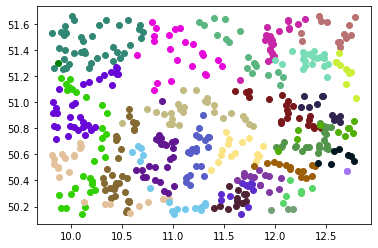

In [29]:
plt.scatter(float(coorx[sample_edges[0][0]]),float(coory[sample_edges[0][0]]),color="green")
random.seed(42)
for tour in tourlist:
    rand_col=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    for i in range(len(tour)-2):
        plt.scatter(float(coorx[sample_edges[tour[i]][0]]),float(coory[sample_edges[tour[i]][0]]),color=rand_col)
        
plt.show()

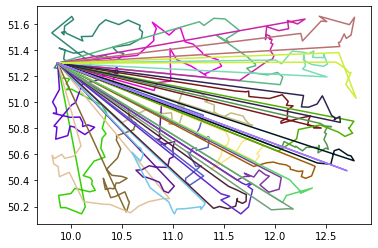

In [33]:

random.seed(42)
for i in range(len(tourlist)):
    xvalues=[float(coorx[sample_edges[0][0]])]
    yvalues=[float(coory[sample_edges[0][0]])]
    rand_col=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    for j in range(len(tourlist[i])-2):
        xvalues.append(float(coorx[sample_edges[tourlist[i][j]][0]]))
        yvalues.append(float(coory[sample_edges[tourlist[i][j]][0]]))
    xvalues.append(float(coorx[sample_edges[0][0]]))
    yvalues.append(float(coory[sample_edges[0][0]]))
    plt.plot(xvalues,yvalues,color=rand_col)
plt.show()
    

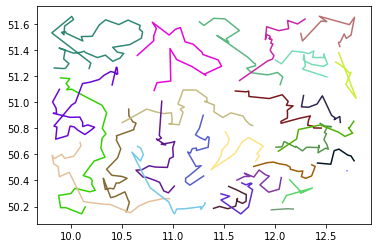

In [39]:
random.seed(42)
for i in range(len(tourlist)):
    #xvalues=[float(coorx[sample_edges[0][0]])]
    #yvalues=[float(coory[sample_edges[0][0]])]
    xvalues=[]
    yvalues=[]
    rand_col=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    for j in range(len(tourlist[i])-2):
        xvalues.append(float(coorx[sample_edges[tourlist[i][j]][0]]))
        yvalues.append(float(coory[sample_edges[tourlist[i][j]][0]]))
    #xvalues.append(float(coorx[sample_edges[0][0]]))
    #yvalues.append(float(coory[sample_edges[0][0]]))
    plt.plot(xvalues,yvalues,color=rand_col)
plt.show()


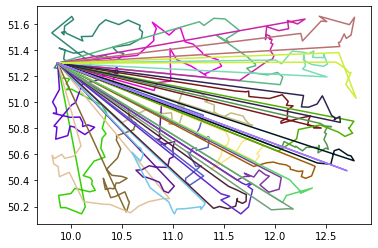

In [35]:
random.seed(42)
for i in range(len(tourlist)):
    xvalues=[float(coorx[sample_edges[0][0]])]
    yvalues=[float(coory[sample_edges[0][0]])]
    rand_col=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    for j in range(len(tourlist[i])-2):
        j=len(tourlist[i])-2-j-1
        xvalues.append(float(coorx[sample_edges[tourlist[i][j]][0]]))
        yvalues.append(float(coory[sample_edges[tourlist[i][j]][0]]))
    xvalues.append(float(coorx[sample_edges[0][0]]))
    yvalues.append(float(coory[sample_edges[0][0]]))
    plt.plot(xvalues,yvalues,color=rand_col)
plt.show()
    

In [37]:
time_of_all_tours=0
length_of_all_tours=0
for tour in tourlist:
    time_of_all_tours+=tour[-1]
    length_of_all_tours+=tour[-2]
print(time_of_all_tours,length_of_all_tours/100000)

245.43689709732183 13645.01886428759


In [41]:
random_tour=[]
for i in range(len(tourlist[2])-2):
    random_tour.append(tourlist[2][i])
    
print(random_tour)

[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 224, 432, 147, 137, 355, 198, 298, 178, 21, 103]


In [68]:
def length_of_tour(tour):
    length=0
    length+=distanc_matrix_13[0][int(tour[0])]
    for i in range(len(tour)-1):
        length+=distanc_matrix_13[int(tour[i])][int(tour[i+1])]
    length+=distanc_matrix_13[int(tour[-1])][0]
    return length


In [63]:
length_of_tour(random_tour)/100000

359.11183588063

In [64]:
tourlist[2][-2]/100000

359.11183588063

In [69]:
#2-opt with first improvement strategy: remove two edges and put two other edges in -> inverse a segment of costumer ordering

n=len(random_tour)
#a 2-opt step:

new_tour=np.zeros(n)
for m in range(0,n):
    new_tour[m]=int(random_tour[m])

def first_improvement(new_tour,distance_matrix,tour_length):
    
    for i in range(2,n): #size of segment; 1 and n don't change the tour
        for j in range(0,n-i+1): #start of segment j end of segment i+j-1
            
            loop_tour=np.zeros(n)
            for m in range(0,n):
                loop_tour[m]=int(new_tour[m])
            
            inverse_segment=np.zeros(i)
            
            for m in range(0,i):
                inverse_segment[m]=loop_tour[j:i+j][::-1][m]
                
            s=0
            
            for k in range(j,i+j): #create the new tour
                while s<i:
                    loop_tour[j+s]=inverse_segment[s]
                    #print(inverse_segment[s])
                    s=s+1
                
            current_l=length_of_tour(loop_tour)
            #print(l)
        
            if current_l<tour_length: #do change the tour if an improvement is found
                #new_tour_length=current_l
                new_tour=loop_tour
                #print(loop_tour)
                break
            
            #else:
                #new_tour=np.zeros(n)
                #for m in range(0,n):
                    #new_tour[m]=int(random_tour[m])
                    
        if current_l<tour_length: #do change the tour if an improvement is found
            break
                    
    return new_tour,current_l
      

In [70]:
#multiple 2-opt steps:

def twoopt(random_tour,distance_matrix):
    
    #initialize tour_length and new_tour
    
    tour_length=length_of_tour(random_tour)
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    #do multiple 2-opt steps
        
    new_length=tour_length
    
    while new_length<=tour_length:
        
        FI2OPT=first_improvement(new_tour,distance_matrix,tour_length)
    
        new_length=FI2OPT[1]
    
        if new_length<tour_length:
            new_tour=FI2OPT[0]
            tour_length=FI2OPT[1]
            #print(tour_length)
        
        else:
            break
        
    return new_tour,tour_length

In [71]:
twoopt(random_tour,distanc_matrix_13)

(array([135., 199.,  70., 109., 145., 365., 167.,  82., 450., 161.,  22.,
        340., 486., 125., 455., 326.,  38., 232., 225., 106., 347.,  47.,
        320., 224., 432., 103., 198., 355., 298., 178.,  21., 137., 147.]),
 34996537.427983694)

In [75]:
#fist improvement strategy

def tour_replace(random_tour,tour_length):
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    current_length=0
    l=tour_length
    a=0
    
    for i in range(0,n): #pick the position of the costumer to replace #PROBLEM: doesn't increase i!!!
        
        #print('i:',i)
        
        replace=int(new_tour[i]) #costumer-1
        #print(replace)
        
        for j in range(0,n): #pick new spot for the costumer
            
            #print('j:',j)
            
            if i==j:
                #print("gleich")
                continue #no change would happen
               
            
            new_tour=np.zeros(n)
            for m in range(0,n):
                new_tour[m]=int(random_tour[m])
               
            
            loop_tour=np.zeros(n)
            for m in range(0,n): #create the new tour
                loop_tour[m]=int(new_tour[m])
                
            #print(loop_tour)
            
            loop_tour[j]=replace
                
            for m in range(0,n):
                                 
                if j>i:
                        
                    if m>=i and m<j:
                        
                        loop_tour[m]=new_tour[m+1]
                        #print(new_tour[m+1])
                                        
                if j<i:
                        
                    if m>j and m<=i:
                        
                        loop_tour[m]=new_tour[m-1]
                        #print(new_tour[m-1])
                        
            #print(loop_tour)                
                        
            current_length=length_of_tour(loop_tour) #length of the created tour
            #print(current_length)
                
            if current_length<l and current_length>0:
                new_tour=loop_tour
                l=current_length
                #print(l)
                #print(loop_tour)
                a=1
                break
                    
        if a==1:
            break
                
    return new_tour,l
                    

In [76]:
#multiple steps:

def multreplace(random_tour,distance_matrix):
    
    #initialize tour_length and new_tour
    
    tour_length=length_of_tour(random_tour)
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    #do multiple steps
        
    new_length=tour_length
    
    while new_length<=tour_length:
        
        #print("STEP")
        
        RP=tour_replace(new_tour,tour_length)
    
        new_length=RP[1]
    
        if new_length<tour_length:
            new_tour=RP[0]
            tour_length=RP[1]
            #print(tour_length)
        
        else:
            break
        
    return new_tour,tour_length

In [77]:
multreplace(random_tour,distanc_matrix_13)

(array([135., 199.,  70., 109., 145., 365., 106., 225., 232.,  38., 326.,
        455., 125., 486., 340.,  22., 161., 450., 167.,  82., 347.,  47.,
        224., 432., 147., 137., 355., 298., 178.,  21., 198., 103., 320.]),
 35356302.67949838)

In [83]:
#2-opt first replace second loop

def mixed1(random_tour,distance_matrix):
    
    print(random_tour)
    
    # initialize with 2-opt:   
    loop_tour=twoopt(random_tour,distance_matrix)[0]
    loop_length=twoopt(random_tour,distance_matrix)[1]
    
    print(loop_tour)
    
    a=0
    
    while a==0: #stop, when there is no improvement
        for i in range(0,10): #maximal number of loops
       
            new_tour=multreplace(loop_tour,distance_matrix)[0]
            print(new_tour)
        
            loop_tour=twoopt(new_tour,distance_matrix)[0]
            print(loop_tour)
            
            if twoopt(new_tour,distance_matrix)[1]-multreplace(loop_tour,distance_matrix)[1]==0:
                a=1
                
            if a==1:
                break
            
        a=1
        
    loop_length=twoopt(loop_tour,distance_matrix)[1]
        
    return loop_tour,loop_length
            


In [81]:
#replace first 2-opt second loop

def mixed2(random_tour,distance_matrix):
    
    #print(random_tour)
    
    # initialize with replacement heuristic:   
    loop_tour=multreplace(random_tour,distance_matrix)[0]
    loop_length=multreplace(random_tour,distance_matrix)[1]
    
    #print(loop_tour)
    
    a=0
    
    while a==0: #stop, when there is no improvement
        for i in range(0,10): #maximal number of loops
        
            new_tour=twoopt(loop_tour,distance_matrix)[0]
            print(new_tour)
        
            loop_tour=multreplace(new_tour,distance_matrix)[0]
            print(loop_tour)
        
            if multreplace(new_tour,distance_matrix)[1]-twoopt(loop_tour,distance_matrix)[1]==0:
                a=1
                
            #print(a)
                
            if a==1:
                break
        
    loop_length=multreplace(loop_tour,distance_matrix)[1]
        
    return loop_tour,loop_length
            



In [82]:
mixed2(random_tour,distanc_matrix_13)

[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]


(array([135., 199.,  70., 109., 145.,  82., 167., 450., 161.,  22., 340.,
        486., 125., 455., 326.,  38., 232., 225., 106., 365., 347.,  47.,
        103., 198., 355., 298., 178.,  21., 137., 147., 432., 224., 320.]),
 33746926.289304405)

In [131]:
mixed1(random_tour,distanc_matrix_13)[1]/100000

[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 224, 432, 147, 137, 355, 198, 298, 178, 21, 103]
[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106. 347.  47. 320. 224. 432. 103. 198. 355.
 298. 178.  21. 137. 147.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]


337.46926289304406

In [90]:
time_matrix=np.zeros((500,500))

In [95]:
def time_of_tour(tour):
    time=0
    if(time_matrix[0][int(tour[0])]>0):
        time+=time_matrix[0][int(tour[0])]
    else:
        try:
            time_matrix[0][int(tour[0])]=nx.astar_path_length(G_all_roads,sample_edges[0][0],sample_edges[int(tour[0])][0],heuristic=tdist_60,weight='time')/(3600*1000)
            time+=time_matrix[0][int(tour[0])]
        except:
            print("error",0,tour[0])
            time_matrix[int(0)][int(tour[0])]=distanc_matrix_13[0][int(tour[0])]/(60/36)
            time+=time_matrix[int(0)][int(tour[0])]
    for i in range(len(tour)-1):
        if(time_matrix[int(tour[i])][int(tour[i+1])]>0):
            time+=time_matrix[int(tour[i])][int(tour[i+1])]
        else:
            try:
                time_matrix[int(tour[i])][int(tour[i+1])]=nx.astar_path_length(G_all_roads,sample_edges[int(tour[i])][0],sample_edges[int(tour[i+1])][0],heuristic=tdist_60,weight='time')/(3600*1000)
                time+=time_matrix[int(tour[i])][int(tour[i+1])]
            except:
                print("error",tour[i],tour[i+1])
                time_matrix[int(tour[i])][int(tour[i+1])]=distanc_matrix_13[int(tour[i])][int(tour[i+1])]/(60/36)
                time+=time_matrix[int(tour[i])][int(tour[i+1])]
    if(time_matrix[int(tour[-1])][0]>0):
        time+=time_matrix[int(tour[-1])][0]
    else:
        try:
            time_matrix[int(tour[-1])][0]=nx.astar_path_length(G_all_roads,sample_edges[int(tour[-1])][0],sample_edges[0][0],heuristic=tdist_60,weight='time')/(3600*1000)
            time+=time_matrix[int(tour[-1])][0]
        except:
            print("error",0,tour[0])
            time_matrix[int(tour[-1])][0]=distanc_matrix_13[int(tour[-1])][0]/(60/36)
            time+=time_matrix[int(tour[-1])][0]
    
    return time


In [96]:
time_of_tour(random_tour)

8.138476824062119

In [97]:
tourlist[2][-1]

8.138476824062119

In [102]:
time_of_tour(mixed1(random_tour,distanc_matrix_13)[0])

[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 224, 432, 147, 137, 355, 198, 298, 178, 21, 103]
[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106. 347.  47. 320. 224. 432. 103. 198. 355.
 298. 178.  21. 137. 147.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]


7.782599112835472

In [106]:
counter=0
for i in range(500):
    for j in range(500):
        if(time_matrix[i][j]!=0):
            counter+=1
print(counter)
print(len(random_tour))

62
33


## Change Length Optimization Algorithms to time Optimization

In [115]:
n=len(random_tour)
#a 2-opt step:

new_tour=np.zeros(n)
for m in range(0,n):
    new_tour[m]=int(random_tour[m])

def first_improvement_time(new_tour,time_matrix,tour_time):
    
    for i in range(2,n): #size of segment; 1 and n don't change the tour
        for j in range(0,n-i+1): #start of segment j end of segment i+j-1
            
            loop_tour=np.zeros(n)
            for m in range(0,n):
                loop_tour[m]=int(new_tour[m])
            
            inverse_segment=np.zeros(i)
            
            for m in range(0,i):
                inverse_segment[m]=loop_tour[j:i+j][::-1][m]
                
            s=0
            
            for k in range(j,i+j): #create the new tour
                while s<i:
                    loop_tour[j+s]=inverse_segment[s]
                    #print(inverse_segment[s])
                    s=s+1
                
            current_l=time_of_tour(loop_tour)
            #print(l)
        
            if current_l<tour_time: #do change the tour if an improvement is found
                #new_tour_length=current_l
                new_tour=loop_tour
                #print(loop_tour)
                break
            
            #else:
                #new_tour=np.zeros(n)
                #for m in range(0,n):
                    #new_tour[m]=int(random_tour[m])
                    
        if current_l<tour_time: #do change the tour if an improvement is found
            break
                    
    return new_tour,current_l
      

In [113]:
def twoopt_time(random_tour,time_matrix):
    
    #initialize tour_length and new_tour
    
    tour_time=time_of_tour(random_tour)
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    #do multiple 2-opt steps
        
    new_time=tour_time
    
    while new_time<=tour_time:
        
        FI2OPT=first_improvement_time(new_tour,time_matrix,tour_time)
    
        new_time=FI2OPT[1]
    
        if new_time<tour_time:
            new_tour=FI2OPT[0]
            tour_time=FI2OPT[1]
            #print(tour_length)
        
        else:
            break
        
    return new_tour,tour_time

In [109]:
def tour_replace_time(random_tour,tour_length):
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    current_length=0
    l=tour_length
    a=0
    
    for i in range(0,n): #pick the position of the costumer to replace #PROBLEM: doesn't increase i!!!
        
        #print('i:',i)
        
        replace=int(new_tour[i]) #costumer-1
        #print(replace)
        
        for j in range(0,n): #pick new spot for the costumer
            
            #print('j:',j)
            
            if i==j:
                #print("gleich")
                continue #no change would happen
               
            
            new_tour=np.zeros(n)
            for m in range(0,n):
                new_tour[m]=int(random_tour[m])
               
            
            loop_tour=np.zeros(n)
            for m in range(0,n): #create the new tour
                loop_tour[m]=int(new_tour[m])
                
            #print(loop_tour)
            
            loop_tour[j]=replace
                
            for m in range(0,n):
                                 
                if j>i:
                        
                    if m>=i and m<j:
                        
                        loop_tour[m]=new_tour[m+1]
                        #print(new_tour[m+1])
                                        
                if j<i:
                        
                    if m>j and m<=i:
                        
                        loop_tour[m]=new_tour[m-1]
                        #print(new_tour[m-1])
                        
            #print(loop_tour)                
                        
            current_length=time_of_tour(loop_tour) #length of the created tour
            #print(current_length)
                
            if current_length<l and current_length>0:
                new_tour=loop_tour
                l=current_length
                #print(l)
                #print(loop_tour)
                a=1
                break
                    
        if a==1:
            break
                
    return new_tour,l

In [110]:
def multreplace_time(random_tour,distance_matrix):
    
    #initialize tour_length and new_tour
    
    tour_length=time_of_tour(random_tour)
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    #do multiple steps
        
    new_length=tour_length
    
    while new_length<=tour_length:
        
        #print("STEP")
        
        RP=tour_replace_time(new_tour,tour_length)
    
        new_length=RP[1]
    
        if new_length<tour_length:
            new_tour=RP[0]
            tour_length=RP[1]
            #print(tour_length)
        
        else:
            break
        
    return new_tour,tour_length

In [111]:
def mixed1_time(random_tour,distance_matrix):
    
    print(random_tour)
    
    # initialize with 2-opt:   
    loop_tour=twoopt_time(random_tour,distance_matrix)[0]
    loop_length=twoopt_time(random_tour,distance_matrix)[1]
    
    print(loop_tour)
    
    a=0
    
    while a==0: #stop, when there is no improvement
        for i in range(0,10): #maximal number of loops
       
            new_tour=multreplace_time(loop_tour,distance_matrix)[0]
            print(new_tour)
        
            loop_tour=twoopt_time(new_tour,distance_matrix)[0]
            print(loop_tour)
            
            if twoopt_time(new_tour,distance_matrix)[1]-multreplace_time(loop_tour,distance_matrix)[1]==0:
                a=1
                
            if a==1:
                break
            
        a=1
        
    loop_length=twoopt_time(loop_tour,distance_matrix)[1]
        
    return loop_tour,loop_length

In [119]:
def mixed2_time(random_tour,distance_matrix):
    
    #print(random_tour)
    
    # initialize with replacement heuristic:   
    loop_tour=multreplace_time(random_tour,distance_matrix)[0]
    loop_length=multreplace_time(random_tour,distance_matrix)[1]
    
    #print(loop_tour)
    
    a=0
    
    while a==0: #stop, when there is no improvement
        for i in range(0,10): #maximal number of loops
        
            new_tour=twoopt_time(loop_tour,distance_matrix)[0]
            print(new_tour)
        
            loop_tour=multreplace_time(new_tour,distance_matrix)[0]
            print(loop_tour)
        
            if multreplace_time(new_tour,distance_matrix)[1]-twoopt_time(loop_tour,distance_matrix)[1]==0:
                a=1
                
            #print(a)
                
            if a==1:
                break
        
    loop_length=multreplace_time(loop_tour,distance_matrix)[1]
        
    return loop_tour,loop_length

In [117]:
mixed1_time(random_tour,time_matrix)

[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 224, 432, 147, 137, 355, 198, 298, 178, 21, 103]
[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106.  47. 347. 320. 224. 432. 103. 198. 298.
  21. 178. 355. 137. 147.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365.  47. 347. 320. 224. 103. 198. 298.  21.
 178. 355. 137. 147. 432.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365.  47. 347. 320. 224. 103. 198. 298.  21.
 178. 355. 137. 147. 432.]


(array([135., 199.,  70., 109., 145.,  82., 167., 450., 161.,  22., 340.,
        486., 125., 455., 326.,  38., 232., 225., 106., 365.,  47., 347.,
        320., 224., 103., 198., 298.,  21., 178., 355., 137., 147., 432.]),
 7.844360400304076)

In [122]:
counter=0
for i in range(500):
    for j in range(500):
        if(time_matrix[i][j]!=0):
            counter+=1
print(counter)
print(len(random_tour))

1122
33


In [120]:
mixed2_time(random_tour,time_matrix)

[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106.  47. 347. 320. 103. 198. 298.  21. 178.
 355. 137. 147. 432. 224.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 298.  21. 178. 355.
 137. 147. 432. 224. 320.]


(array([135., 199.,  70., 109., 145.,  82., 167., 450., 161.,  22., 340.,
        486., 125., 455., 326.,  38., 232., 225., 106., 365., 347.,  47.,
        103., 198., 298.,  21., 178., 355., 137., 147., 432., 224., 320.]),
 7.736118721909774)

In [130]:
length_of_tour(mixed2_time(random_tour,time_matrix)[0])/100000

[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106.  47. 347. 320. 103. 198. 298.  21. 178.
 355. 137. 147. 432. 224.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 298.  21. 178. 355.
 137. 147. 432. 224. 320.]


337.507662893044

## Plot the Optimization

In [121]:
orig=random_tour
km_mixed_1=mixed1(random_tour,distanc_matrix_13)[0]
km_mixed_2=mixed2(random_tour,distanc_matrix_13)[0]

time_mixed_1=mixed1_time(random_tour,distanc_matrix_13)[0]
time_mixed_2=mixed2_time(random_tour,distanc_matrix_13)[0]

[135, 199, 70, 145, 109, 365, 106, 225, 232, 38, 326, 455, 125, 486, 340, 22, 161, 450, 167, 82, 347, 47, 320, 224, 432, 147, 137, 355, 198, 298, 178, 21, 103]
[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106. 347.  47. 320. 224. 432. 103. 198. 355.
 298. 178.  21. 137. 147.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]
[135. 199.  70. 109. 145. 365. 167.  82. 450. 161.  22. 340. 486. 125.
 455. 326.  38. 232. 225. 106. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 320.]
[135. 199.  70. 109. 145.  82. 167. 450. 161.  22. 340. 486. 125. 455.
 326.  38. 232. 225. 106. 365. 347.  47. 103. 198. 355. 298. 178.  21.
 137. 147. 432. 224. 3

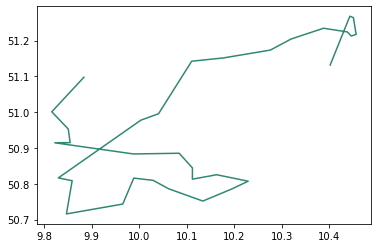

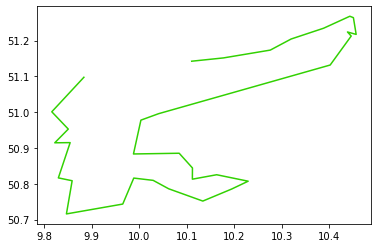

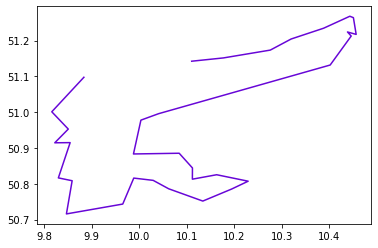

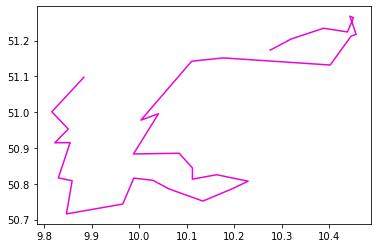

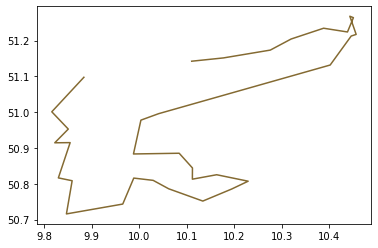

In [127]:
random.seed(42)
plot_list=[orig,list(km_mixed_1),list(km_mixed_2),list(time_mixed_1),list(time_mixed_2)]
for i in range(len(plot_list)):
    #xvalues=[float(coorx[sample_edges[0][0]])]
    #yvalues=[float(coory[sample_edges[0][0]])]
    xvalues=[]
    yvalues=[]
    rand_col=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    for j in range(len(plot_list[i])):
        #print(i,j)
        xvalues.append(float(coorx[sample_edges[int(plot_list[i][j])][0]]))
        yvalues.append(float(coory[sample_edges[int(plot_list[i][j])][0]]))
    #xvalues.append(float(coorx[sample_edges[0][0]]))
    #yvalues.append(float(coory[sample_edges[0][0]]))
    plt.plot(xvalues,yvalues,color=rand_col)
    plt.show()
